# Neural networks -- a little history and background

### Not a new idea

Neural networks were first proposed in 1943. A [paper by McCulloch and Pitts](http://www.cse.chalmers.se/~coquand/AUTOMATA/mcp.pdf), inspired by neurophysiology, introduced highly simplified "neurons" that could be interconnected, forming the first mathematical model of a neural network.

### Winter is coming

In 1969, a <a href="https://en.wikipedia.org/wiki/Perceptrons_(book)">book by Minsky and Papert</a>, seeming to highlight severe limitations of these "connectionist" models, brought research in this subfield of AI [to a complete stop](https://en.wikipedia.org/wiki/AI_winter). It wasn't until the mid-eighties, with the work of [Hopfield, Rumelhart, Hinton, and Williams](https://books.google.com/books/about/AI.html?id=QJNQAAAAMAAJ), that interest (and funding) in neural networks began anew.

Research into neural networks suffered not one, but two *AI winters*. Though the second winter was largely perceptual and economical, with some progress still being made, it wasn't until a combination of factors aligned that neural networks started to truly flourish. Amongst those factors : computational power and big(ger) data.

### What's in a name ?

The fundamental computational unit of a neural network is the *neuron*.

<img src="images/bio_neuron.png" width="500px" />

<img src="images/neuron.png" width="500px" />

A neuron accepts a number of inputs, *processes* them, and returns a single value. The early McCulloch and Pitts neurons are a little different to today's models, but fundamentally, they operate in a similar manner.

### Inputs

The inputs to our neuron, $x$, are often *real numbers* like 0.042 or -3.14. Each neuron has one or more inputs.

So far, we have :
$$
\displaystyle x_1 \quad x_2 \quad x_3
$$

### Weights

Each input is *weighted* by a real number. The weights, $w$, essentially determine the importance for each input. **Weights are what we're interested in learning.**

So far, we have :
$$
\displaystyle w_1 \times x_1 \quad w_2 \times x_2 \quad w_3 \times x_3
$$

### Summing the weighted inputs

After each input has been weighted by its own weight, we add everything up into a single number, $z$.

So far, we have :
$$
\displaystyle z \; = \; w_1 x_1 \; + \; w_2 x_2 \; + \; w_3 x_3
$$

... but wait -- isn't this just a linear regression ?

### Enter the activation function

[Activation functions](https://en.wikipedia.org/wiki/Activation_function) are (generally) non-linear functions that we apply to $z$ to compute the neuron's final output. Let's call them $\phi(z)$.

Early activation functions, inspired from biological neurons, were binary : either 0 or 1, "spiking or not". Today, we often opt for the *ReLU* activation function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Some interesting space of weighted inputs to consider
x = np.linspace(-5, 5, 100)

# Define a few classic activation functions 
heaviside = x >= 0
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

# Plotting lines at x = 0 and y = 0
def plot_zeros():
    plt.axhline(0, c="k", ls="--")
    plt.axvline(0, c="k", ls="--")
    
# Plot all the things
def plot_activation_functions():
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(2, 2, 1)
    plot_zeros()
    plt.plot(x, heaviside, lw=5, alpha=0.8)
    plt.title("Heaviside (binary)")
    
    plt.subplot(2, 2, 2)
    plot_zeros()
    plt.plot(x, sigmoid, lw=5, alpha=0.8)
    plt.title("Sigmoid")
    
    plt.subplot(2, 2, 3)
    plot_zeros()
    plt.plot(x, tanh, lw=5, alpha=0.8)
    plt.title("Hyperbolic tangent")
    
    plt.subplot(2, 2, 4)
    plot_zeros()
    plt.plot(x, relu, lw=5, alpha=0.8)
    plt.title("Rectified linear unit (ReLU)")
    
    plt.tight_layout()

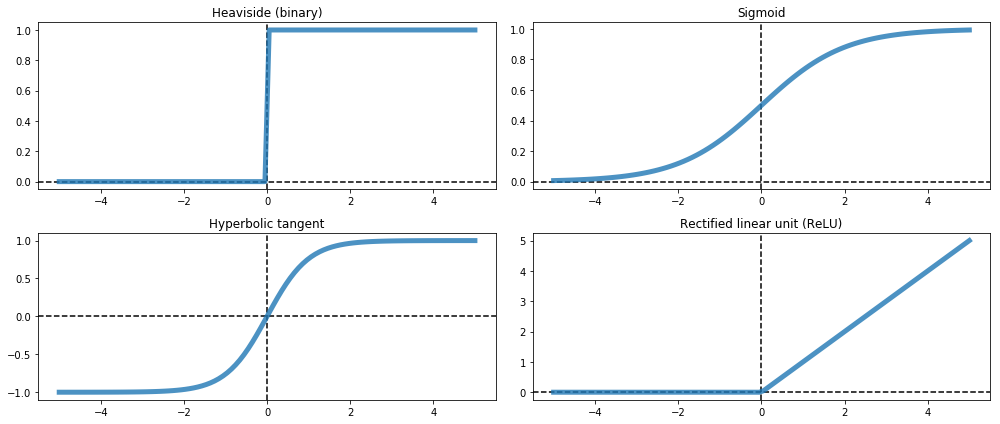

In [2]:
plot_activation_functions()

### A neuron's output

After weighting inputs, summing the result, and passing that through an activation function, we finally have the neuron's output.

Finally, we have :

$$
y \; = \; \phi(z) \; = \; \phi \left( \sum_{i=1}^N w_i \, x_i \right)
$$

### Why activation functions ?

Activation functions introduce nonlinearity into the network. This allows us to model relationships between inputs and outputs as nonlinear functions. 

Without nonlinear activation functions, a deep neural network with many layers would behave only as a single linear neuron, because outputs would be linear functions of their inputs.

### Properties of activation functions

- monotonic
- often saturate as $|\,x\,| \to \infty$ (although less these days)
- have well-defined derivatives

### Neural networks -- putting it all together

A neural network is simply a bunch of neurons connected together.

<img src="images/nn.png" width="400px" />

### Anatomy of a neural network

Most neural networks these days have well-defined *layers*. The *input layer* is the very first layer, where the data go. There's one neuron per dimension of the data.

The neural network's output, at the last layer, is of course called the *output layer* (even if there's only one output). 

In between are the *hidden layers*. 

Remember that each arrow here represents a weight, $w_i$, and that each node represents the summing of that neuron's weighted inputs, followed by an activation function.

### Making predictions

To obtain a prediction from a neural network, we simply present it with the data. For each neuron, inputs will be multiplied by their weights, summed, pushed through an activation function, and then passed down the line to the next neuron. This continues until we arrive at the output layer, where our prediction is ready.

### Neural networks as models

When we create a neural network, we pick some properties quite deliberately (the number of layers, the number of neurons in each layer, the activation functions), but some things, we leave to chance. In particular, the weights $w$ are initialised (almost) randomly.

How then, can we expect to have a reasonable prediction by presenting our data to this network with random weights ?

The answer is *backpropagation* and *gradient descent*.

### Backpropagation

Backpropagation is a method for calculating the *gradient* of the loss function with respect to the weights. In simpler terms, backpropagation is the use of calculus to figure out in which direction we should push each weight in our network, in order to improve on our loss function.

The fundamental assumption we're making here is that there is a "good direction" to go in adjusting our weights. That's where gradient descent comes in.

### Gradient descent

Imagine you're up in the Cascades, and you're trying to get off the mountain, down to sea level. Imagine you can't see very far around you, that there's a heavy fog. In fact, you can only see as far as your outstretched arm. 

You look around you, pick the direction that causes you to lose the maximum elevation, and take a step. Then, you start again.

In this analogy, your height above sea level is the value of the loss function, your map coordinates is the set of weights, and you taking a step is the updating of our weights. 

### Taking steps in weight space

We don't know how high the mountain is at all points on the map. That is, we don't know what the value of the loss function is, for all sets of weights. We can figure out how high we are for the point on the map we're at, and we can figure out, for a very small area around us, which direction would best take us lower in elevation.

We can evaluate how much the loss function drops or increases for each direction around us by using backpropagation. Taking a step in that direction, is *gradient descent*.

<img src="images/gradient_descent.png" width="600px" />

### Training a neural network

In a nutshell, the procedure to train a neural network goes like this :
- given some data, make a prediction by pushing it through the network
- calculate how well you're doing, by using a loss function
- calculate at each layer how the errors will change when we change the weights at this layer (backpropagation)
- pick a small change in the weights that will reduce the error (gradient descent)
- rinse and repeat

### Breaking it down

For a given set of weights, we can see how close our predictions are to our data. "How close" is measured by a loss function, which captures our prediction errors in a single number.

Using calculus, we can figure out how our loss function changes, if we make small, simple changes to our weights.

By repeatedly trying some predictions, assessing our loss, determining which small changes should make to our weights, and applying those changes, we should progressively get closer and closer to a set of weights that works well for our problem.

### Weights that work

To train a neural network, the general idea is to repeatedly update the network's weights, by using backpropagation, until you reach a point where the network is doing what you expect.

Whilst there's no guarantee that backpropagation will find the optimal set of weights, or even a set of weights that works even reasonably (depending on your data, your problem, and your network's architecture), we do know that [a neural network is capable of learning continuous functions](https://en.wikipedia.org/wiki/Universal_approximation_theorem) under certain conditions -- and often, a neural network can do pretty well, if the problem is appropriate.

### Wrapping up

A neural network is a connected set of simple neurons. These neurons take in inputs, which they weigh, sum, and apply an activation function to.

The part of the network that we change when we're training it is the set of weights, $w$. Because this is done a little at a time, we have to go through the entire dataset many times -- this is called an *epoch*.

Assuming the network is correctly set up and suits the problem, and that the data are reasonable, we can expect a neural network that produces reasonable predictions after a number of training epochs.